### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01

[[ 2.03555871e-01 -8.73217696e+00]
 [ 1.04467867e+01  1.52281395e+00]
 [-9.65686150e+00  2.81506617e+00]
 [ 5.14712966e+00  8.32067548e+00]
 [-5.48156295e+00  8.96372316e+00]
 [-1.00623735e+01  6.68754126e-01]
 [ 5.38610523e+00  8.61374069e+00]
 [ 3.69813145e+00  8.89054045e+00]
 [-1.01932433e+01  8.03483175e-02]
 [-5.72789236e+00 -7.76136334e+00]
 [-1.02483299e+01  1.42289582e-01]
 [ 8.69978383e+00  5.67644843e+00]
 [ 1.94761947e+00  9.91420922e+00]
 [-1.43166187e-01  9.68891700e+00]
 [ 9.52493954e+00 -5.81293704e-01]
 [-7.15220436e+00  5.90083135e+00]
 [ 1.00742162e+01 -4.70942867e-02]
 [ 6.69924972e+00  6.21781239e+00]
 [ 5.32041929e+00 -7.81979393e+00]
 [ 9.59794470e+00 -1.93090579e+00]
 [ 9.62118721e+00  3.09580275e+00]
 [ 6.64759984e+00 -7.88932037e+00]
 [ 7.13912122e+00  6.70485028e+00]
 [ 2.98512181e+00  9.84349044e+00]
 [-5.03140380e+00 -8.79769595e+00]
 [ 9.85517603e+00  9.31245104e-01]
 [-1.63125977e+00  1.01084302e+01]
 [ 2.21853739e+00  1.04083511e+01]
 [-5.28659171e+00 -8

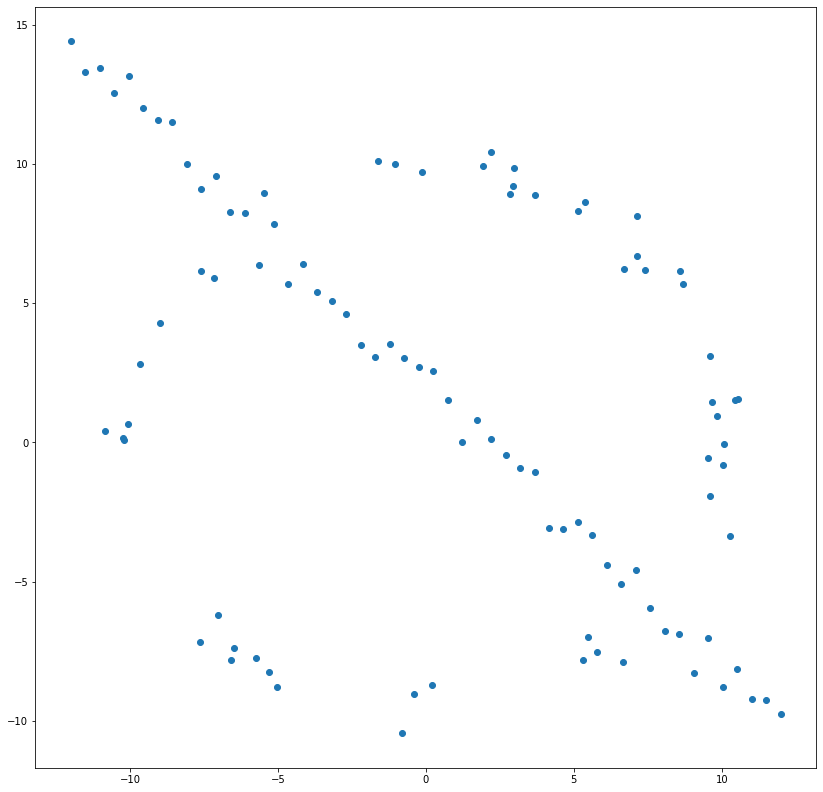

In [541]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) , y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))
print(X)
fig, ax = plt.subplots(figsize=(14,14))
ax.scatter(X[:,0], X[:,1])
# ax.axis('off')
plt.show()

In [542]:
import random
b=random.sample(range(1, 100), 3)
b

[90, 37, 50]

In [543]:
X[0]

array([ 0.20355587, -8.73217696])

[23, 74, 32]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 2.98512181  9.84349044]
 [-0.24489796  2.69061107]
 [-6.59415094 -7.80811042]]
[[ 2.98512181  9.84349044  1.        ]
 [-0.24489796  2.69061107  1.        ]
 [-6.59415094 -7.80811042  1.        ]]
[[-105.80525631]
 [  -7.29936296]
 [-104.44941492]]
[[150.29850771]
 [-81.64167383]
 [249.17442651]]
[-75.14925386] [40.82083692] [84.05103602]


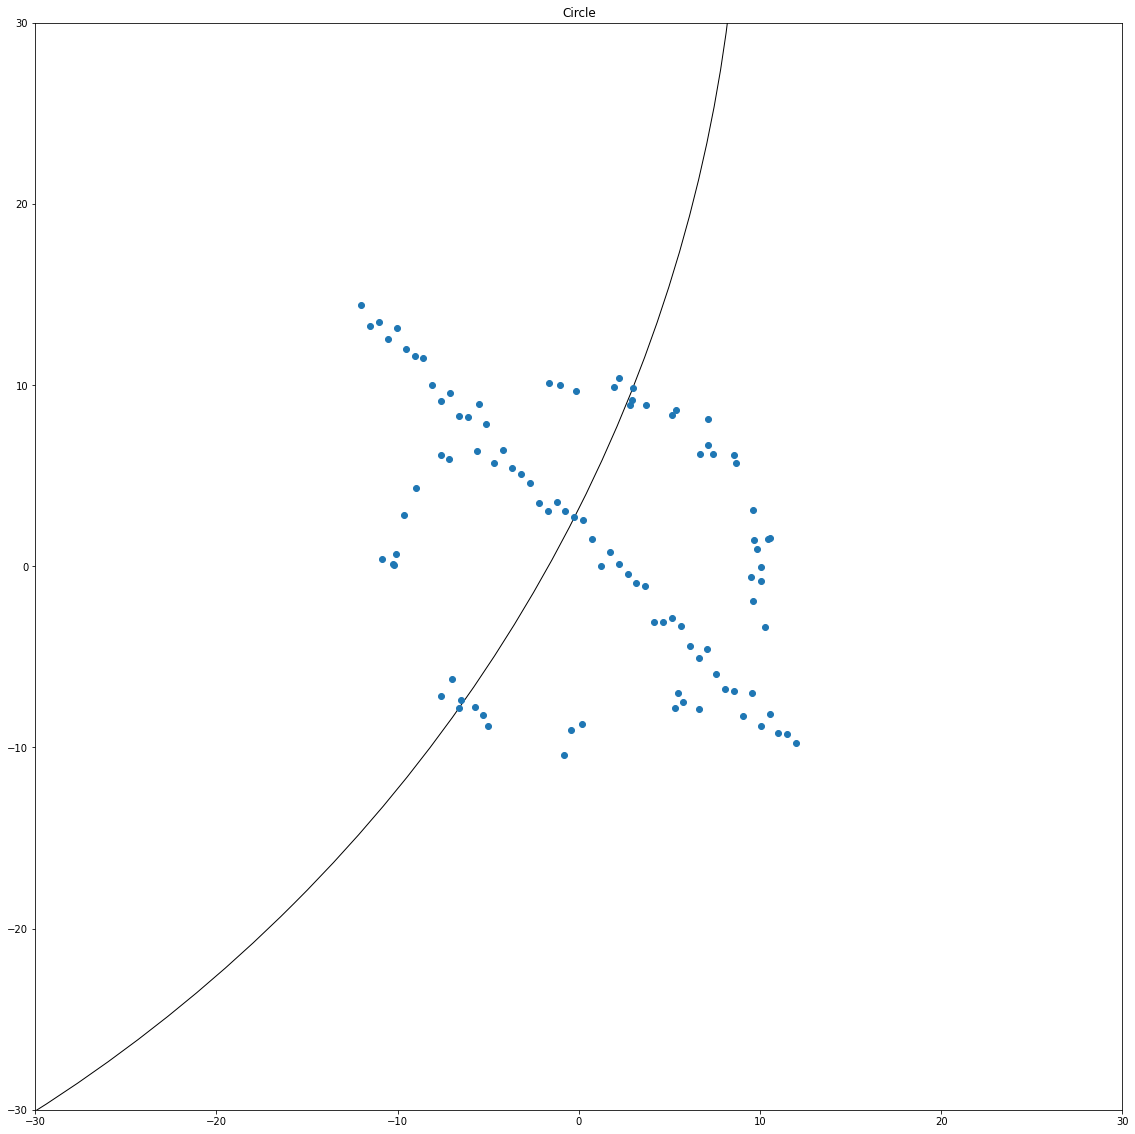

In [544]:
import random
b=random.sample(range(1, N), 3)
print(b)
x1=np.zeros([3,2])
print(x1)
for i in range(3):
    x1[i]=X[b[i]]
print(x1)

x2 = np.hstack((x1,np.ones((3,1))))
print(x2)

x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
x3=x3.reshape(3,1)
print(x3)

c=np.matmul(np.linalg.inv(x2),x3)
print(c)
c_x=-c[0]/2
c_y=-c[1]/2
radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])

print(c_x,c_y,radius)

figure, axes = plt.subplots(figsize=(20,20))
draw_circle = plt.Circle((c_x, c_y), radius,fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.scatter(X[:,0], X[:,1])
plt.title('Circle')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()


In [545]:
def isInlier(x,y,cx,cy,r):
    r_=(x-cx)**2+(y-cy)**2
    if r-0.8 < np.sqrt(r_) < r+0.8:
        return True
    else: return False

def inlierCount(points,cx,cy,r):
    n=0
    for i in points:
        if isInlier(i[0],i[1],cx,cy,r):
            n+=1
    return n

print(inlierCount(X,c_x,c_y,radius))

9


In [546]:
def circleEstimate(itss,min_inliers,N,points, tres):
    its = itss
    maxins=0
    while maxins<min_inliers or its>0:
        b=random.sample(range(1, N), 3)
        x1=np.zeros([3,2])
        for i in range(3):
            x1[i]=points[b[i]]

        x2 = np.hstack((x1,np.ones((3,1))))
        x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
        x3=x3.reshape(3,1)
        c=np.matmul(np.linalg.inv(x2),x3)
        c_x=-c[0]/2
        c_y=-c[1]/2
        radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])
        if radius>30:continue
        inls,arr = inlierCount(points,c_x,c_y,radius,tres)
        
        if maxins < inls:
            maxins=inls
            circ=[c_x,c_y,radius]
            inlLs=arr
            best=x1
            cent=(c_x,c_y)
        if maxins>=40:
            its-=1
    return maxins,circ,inlLs,best,cent

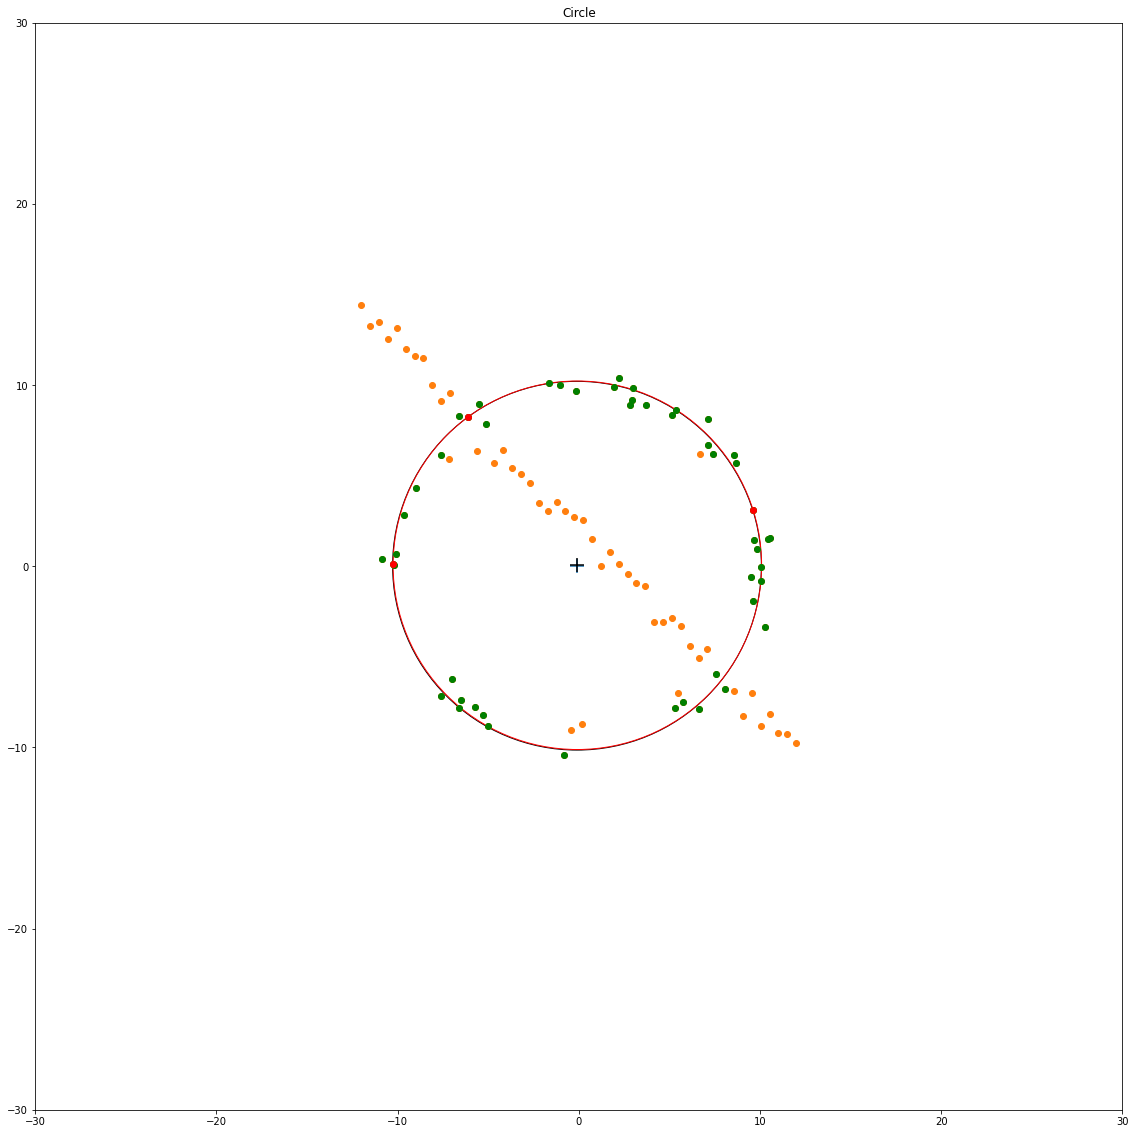

50 50


In [547]:
import random


def isInlier(x,y,cx,cy,r,T):
    r_=(x-cx)**2+(y-cy)**2
    if r-T < np.sqrt(r_) < r+T:
        return True
    else: return False

def inlierCount(points,cx,cy,r,T):
    n=0
    inlier_arr=np.zeros((1,2))
    for i in points:
        if isInlier(i[0],i[1],cx,cy,r,T):
            n+=1
            if not inlier_arr.any():
                inlier_arr[0]=i
            else:
                inlier_arr=np.concatenate((inlier_arr,[i]),axis=0)
    return n,inlier_arr

# its = 250
# maxins=0
# circ=[]
# while maxins<42 or its>0:
#     b=random.sample(range(1, N), 3)
#     x1=np.zeros([3,2])
#     for i in range(3):
#         x1[i]=X[b[i]]

#     x2 = np.hstack((x1,np.ones((3,1))))
#     x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
#     x3=x3.reshape(3,1)
#     c=np.matmul(np.linalg.inv(x2),x3)
#     c_x=-c[0]/2
#     c_y=-c[1]/2
#     radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])
#     if radius>30:continue
#     inls,arr = inlierCount(X,c_x,c_y,radius,0.9)
    
#     if maxins < inls:
#         maxins=inls
#         circ=[c_x,c_y,radius]
#         inlLs=arr
#     if maxins>=40:
#         its-=1
# print(inlLs)
m1,circ,inls,bestpoints,cent=circleEstimate(250,42,N,X,0.9)
figure, axes = plt.subplots(figsize=(20,20))
draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False)
axes.scatter(cent[0], cent[1],marker='+',s=200)
axes.set_aspect(1)
axes.add_artist(draw_circle)

# NN=m
# its = 250
# maxins=0
# circ=[]
# best=np.zeros([3,2])
# while maxins<43 or its>0:
#     b=random.sample(range(1, NN), 3)
#     x1=np.zeros([3,2])
#     for i in range(3):
#         x1[i]=inlLs[b[i]]

#     x2 = np.hstack((x1,np.ones((3,1))))
#     x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
#     x3=x3.reshape(3,1)
#     c=np.matmul(np.linalg.inv(x2),x3)
#     c_x=-c[0]/2
#     c_y=-c[1]/2
#     radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])
#     if radius>30:continue
#     inls,arr = inlierCount(X,c_x,c_y,radius,0.9)
    
#     if maxins < inls:
#         maxins=inls
#         circ=[c_x,c_y,radius]
#         best=x1
#         inlLLs=arr
#     if maxins>=40:
#         its-=1
m,circ,inls,bestpoints,cent=circleEstimate(250,43,m1,inls,0.9)
draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False,color='r')
axes.add_artist(draw_circle)
axes.scatter(X[:,0], X[:,1])
axes.scatter(inls[:,0], inls[:,1],color='g')
axes.scatter(bestpoints[:,0], bestpoints[:,1],color='r')
axes.scatter(cent[0], cent[1],marker='+',c='black',s=200)
plt.title('Circle')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()

print(m1,m)